In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,6,Friuli Venezia Giulia,319,40,359,8272,8631,-125,124,...,10.0,5797.0,1022.0,-122.0,11.14,4.16,2.14,12.13,-6.98,-1.43
424,2021-04-24T17:00:00,6,Friuli Venezia Giulia,291,37,328,8123,8451,-180,204,...,8.0,8398.0,1934.0,-149.0,11.28,3.88,2.43,10.55,-7.50,-2.09
425,2021-04-25T17:00:00,6,Friuli Venezia Giulia,282,37,319,7982,8301,-150,184,...,11.0,6635.0,2059.0,-141.0,11.60,3.84,2.77,8.94,0.00,-1.77
426,2021-04-26T17:00:00,6,Friuli Venezia Giulia,286,37,323,7942,8265,-36,100,...,7.0,3033.0,1099.0,-40.0,11.46,3.91,3.30,9.10,0.00,-0.43


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 186
Nuovi tamponi: 7347.0
Percentuale nuovi positivi/nuovi tamponi: 2.5 %
Nuovi guariti: 397.0
Nuovi deceduti: 10.0
Variazione positivi ricoverati con sintomi: -19.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: -197.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,6,Friuli Venezia Giulia,348,56,404,9471,9875,235,468,...,6.0,8591.0,2806.0,222.0,13.86,4.09,5.45,16.68,0.00,2.44
1,2021-02-27T17:00:00,6,Friuli Venezia Giulia,355,62,417,9568,9985,110,468,...,11.0,8079.0,2491.0,97.0,14.87,4.18,5.79,18.79,10.71,1.11
2,2021-02-28T17:00:00,6,Friuli Venezia Giulia,361,61,422,9660,10082,97,341,...,7.0,4337.0,1841.0,92.0,14.45,4.19,7.86,18.52,-1.61,0.97
3,2021-03-01T17:00:00,6,Friuli Venezia Giulia,373,62,435,9727,10162,80,172,...,3.0,2047.0,917.0,67.0,14.25,4.28,8.40,18.76,1.64,0.79
4,2021-03-02T17:00:00,6,Friuli Venezia Giulia,380,61,441,9765,10206,44,479,...,12.0,9579.0,3172.0,38.0,13.83,4.32,5.00,15.10,-1.61,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,6,Friuli Venezia Giulia,319,40,359,8272,8631,-125,124,...,10.0,5797.0,1022.0,-122.0,11.14,4.16,2.14,12.13,-6.98,-1.43
57,2021-04-24T17:00:00,6,Friuli Venezia Giulia,291,37,328,8123,8451,-180,204,...,8.0,8398.0,1934.0,-149.0,11.28,3.88,2.43,10.55,-7.50,-2.09
58,2021-04-25T17:00:00,6,Friuli Venezia Giulia,282,37,319,7982,8301,-150,184,...,11.0,6635.0,2059.0,-141.0,11.60,3.84,2.77,8.94,0.00,-1.77
59,2021-04-26T17:00:00,6,Friuli Venezia Giulia,286,37,323,7942,8265,-36,100,...,7.0,3033.0,1099.0,-40.0,11.46,3.91,3.30,9.10,0.00,-0.43


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

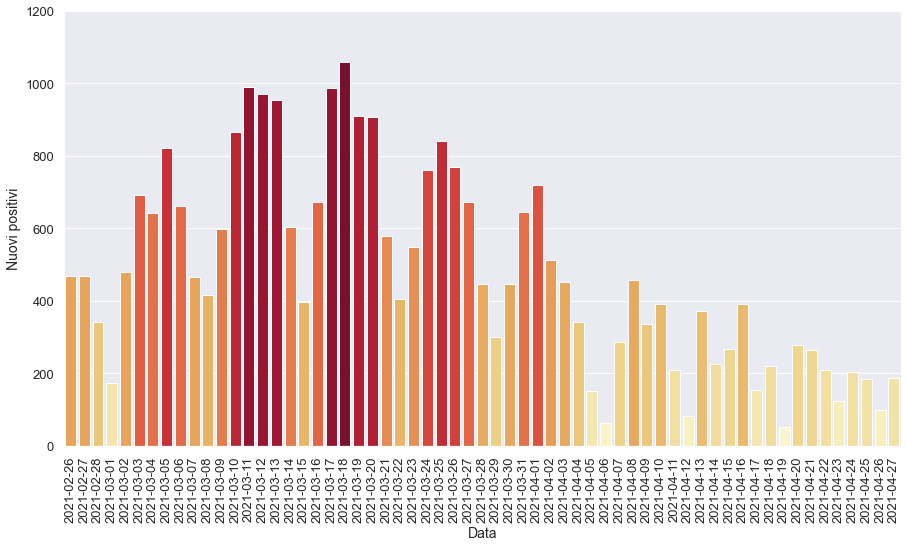

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

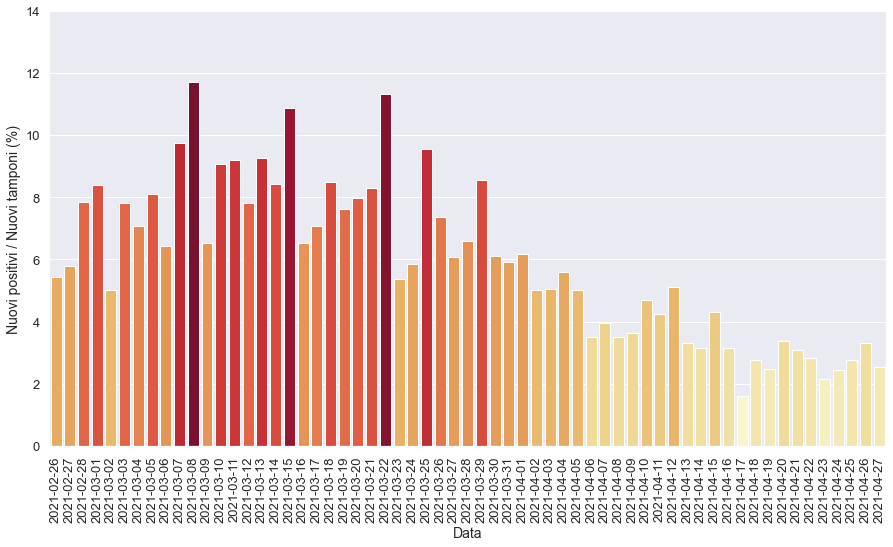

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

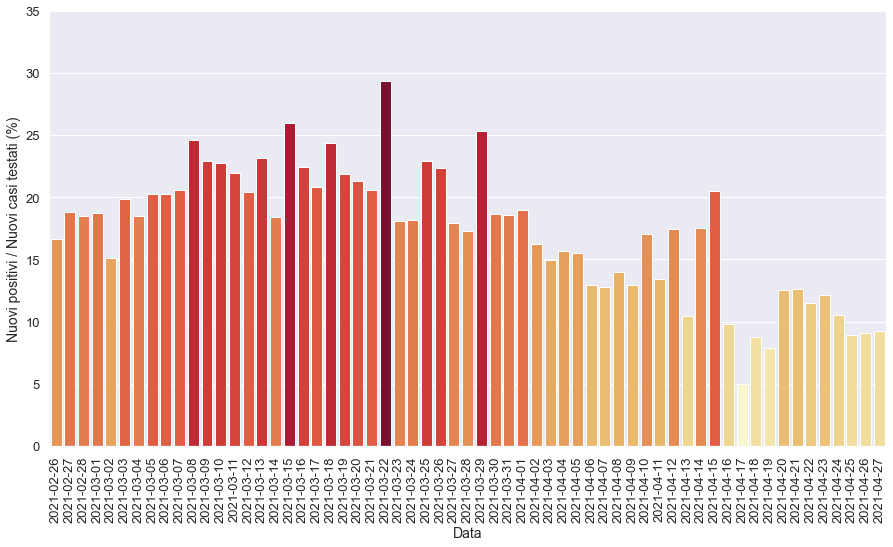

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

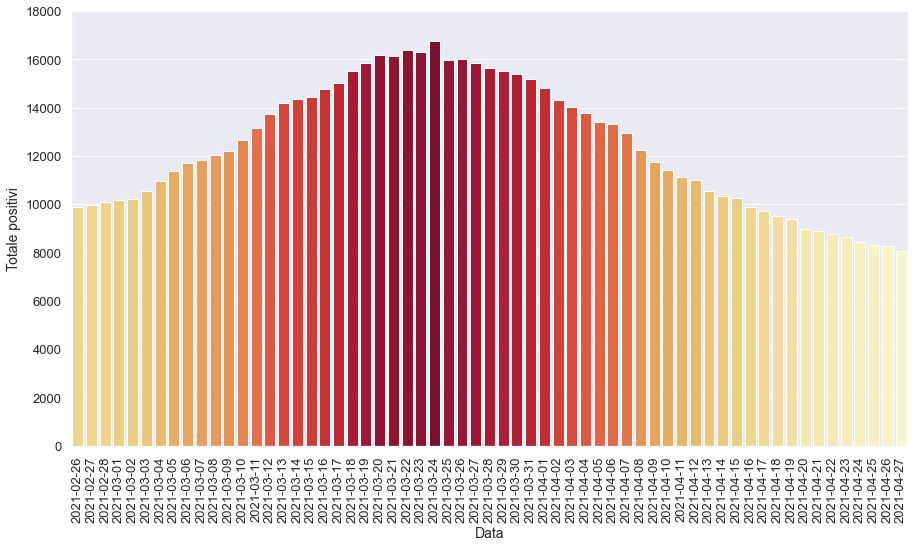

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

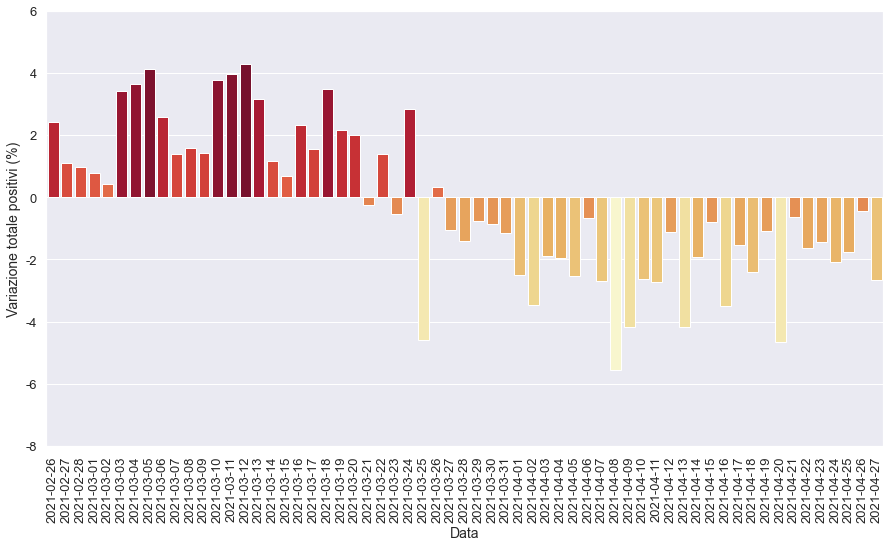

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

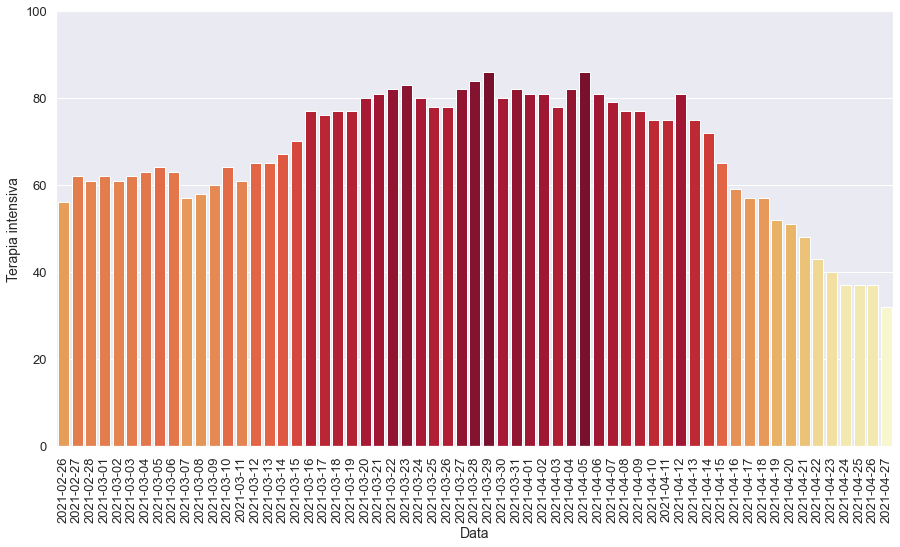

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

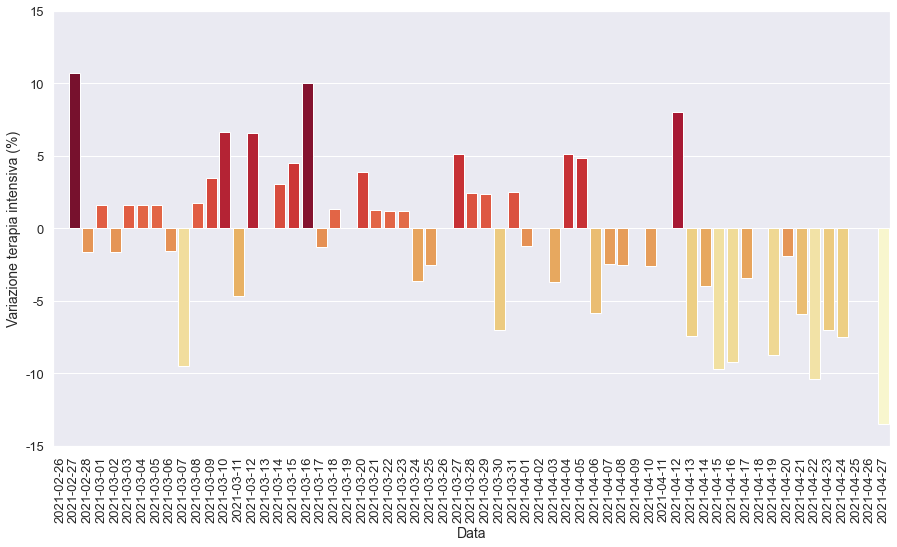

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

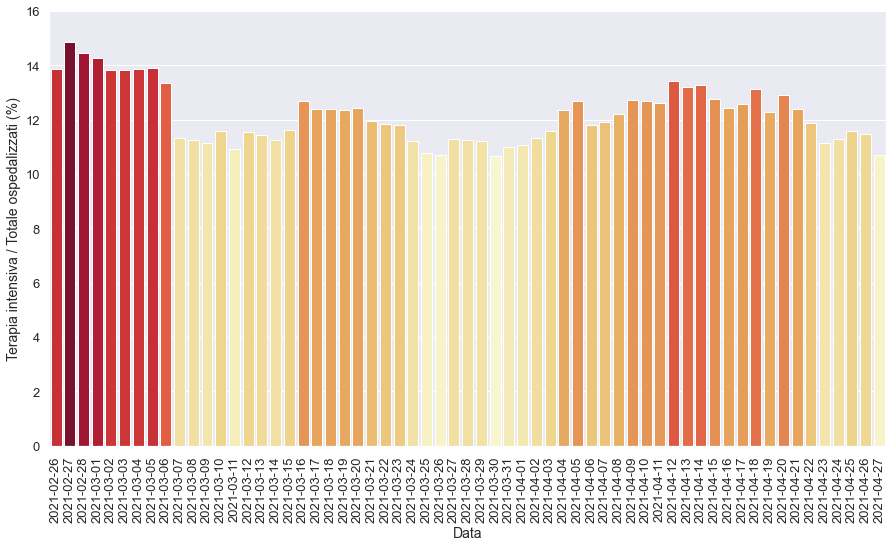

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

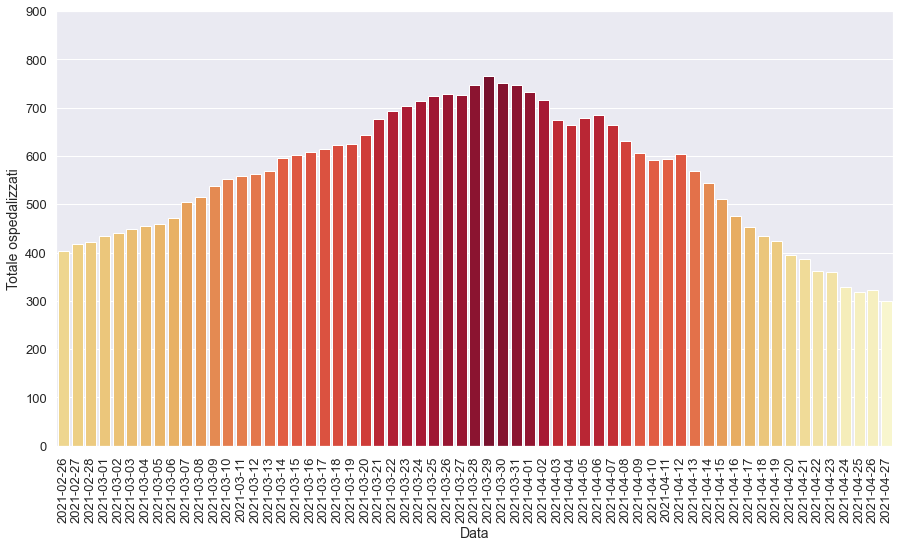

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

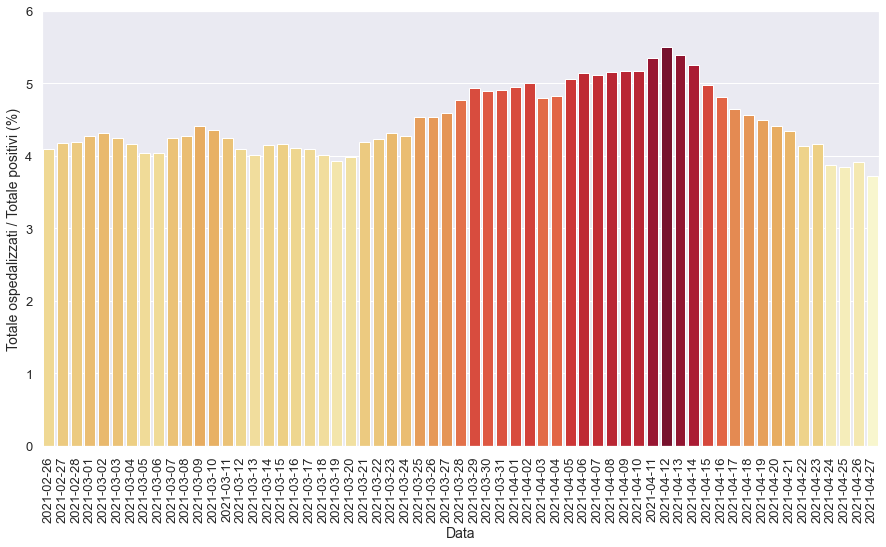

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

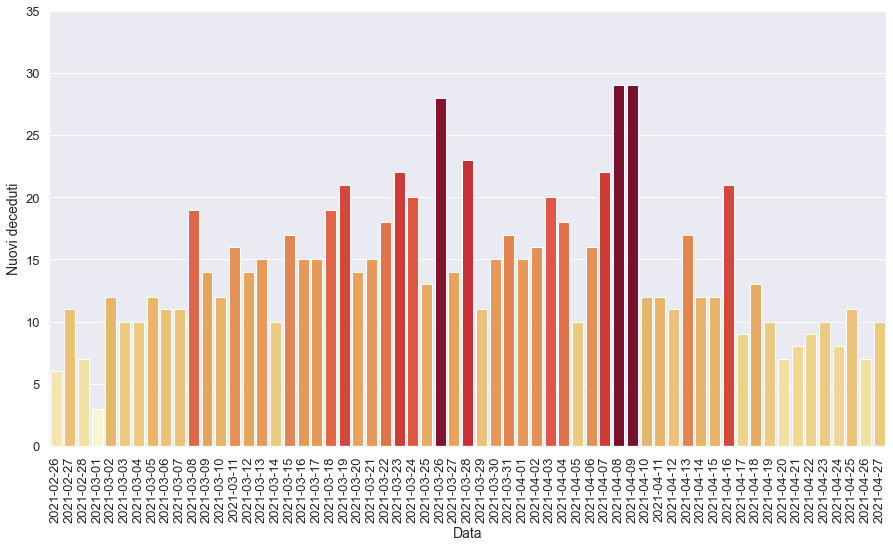

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

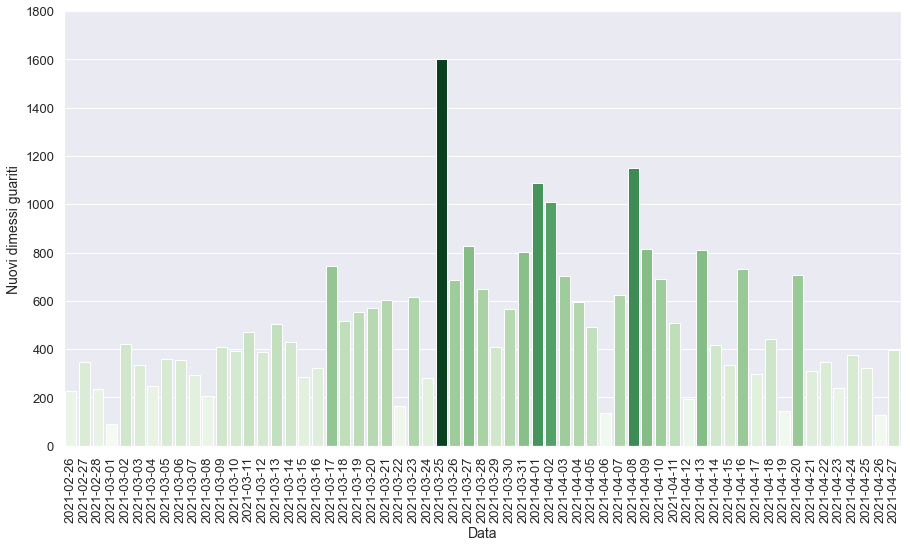

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,6,Friuli Venezia Giulia,662,84,746,14880,15626,-225,446,...,23.0,6767.0,2584.0,-244.0,11.26,4.77,6.59,17.26,2.44,-1.42
1,2021-03-29T17:00:00,6,Friuli Venezia Giulia,680,86,766,14740,15506,-120,301,...,11.0,3520.0,1189.0,-140.0,11.23,4.94,8.55,25.32,2.38,-0.77
2,2021-03-30T17:00:00,6,Friuli Venezia Giulia,671,80,751,14622,15373,-133,447,...,15.0,7300.0,2397.0,-118.0,10.65,4.89,6.12,18.65,-6.98,-0.86
3,2021-03-31T17:00:00,6,Friuli Venezia Giulia,664,82,746,14451,15197,-176,644,...,17.0,10855.0,3473.0,-171.0,10.99,4.91,5.93,18.54,2.50,-1.14
4,2021-04-01T17:00:00,6,Friuli Venezia Giulia,652,81,733,14083,14816,-381,720,...,15.0,11623.0,3790.0,-368.0,11.05,4.95,6.19,19.00,-1.22,-2.51
5,2021-04-02T17:00:00,6,Friuli Venezia Giulia,634,81,715,13589,14304,-512,513,...,16.0,10227.0,3159.0,-494.0,11.33,5.00,5.02,16.24,0.00,-3.46
6,2021-04-03T17:00:00,6,Friuli Venezia Giulia,596,78,674,13358,14032,-272,452,...,20.0,8924.0,3027.0,-231.0,11.57,4.80,5.06,14.93,-3.70,-1.90
7,2021-04-04T17:00:00,6,Friuli Venezia Giulia,582,82,664,13096,13760,-272,342,...,18.0,6116.0,2183.0,-262.0,12.35,4.83,5.59,15.67,5.13,-1.94
8,2021-04-05T17:00:00,6,Friuli Venezia Giulia,592,86,678,12732,13410,-350,150,...,10.0,2981.0,966.0,-364.0,12.68,5.06,5.03,15.53,4.88,-2.54
9,2021-04-06T17:00:00,6,Friuli Venezia Giulia,604,81,685,12637,13322,-88,63,...,16.0,1793.0,488.0,-95.0,11.82,5.14,3.51,12.91,-5.81,-0.66


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

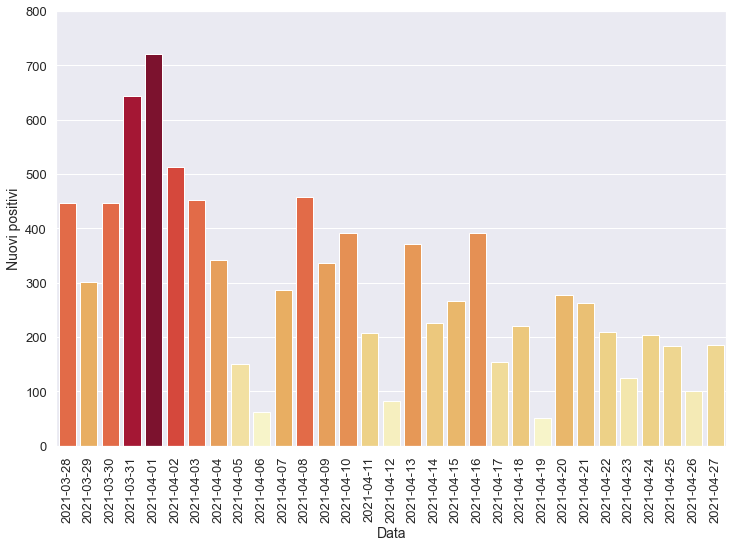

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

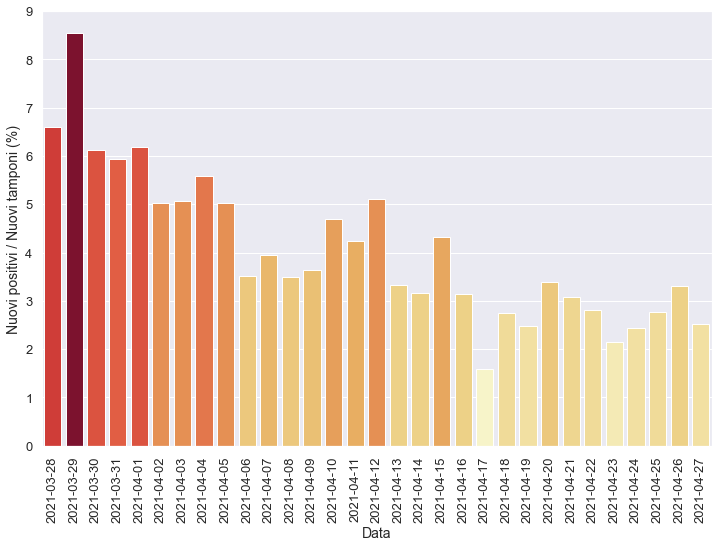

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

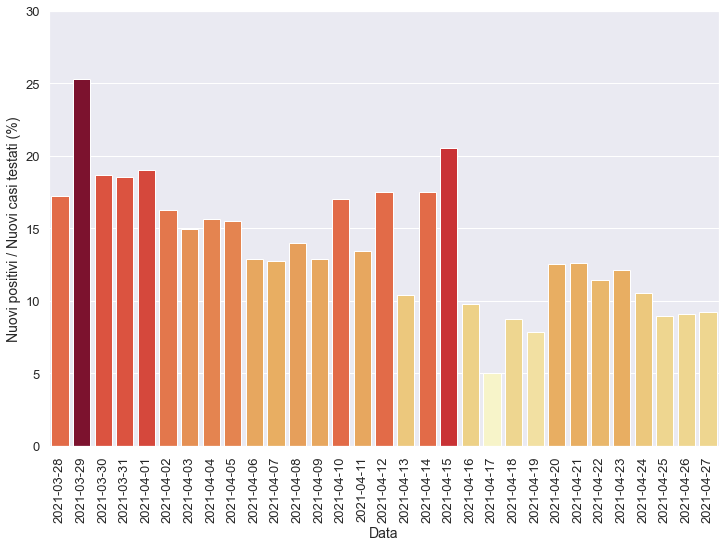

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

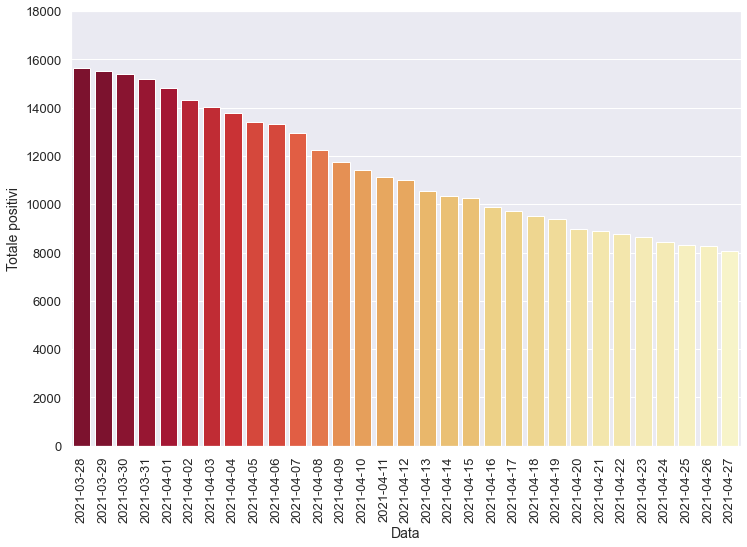

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

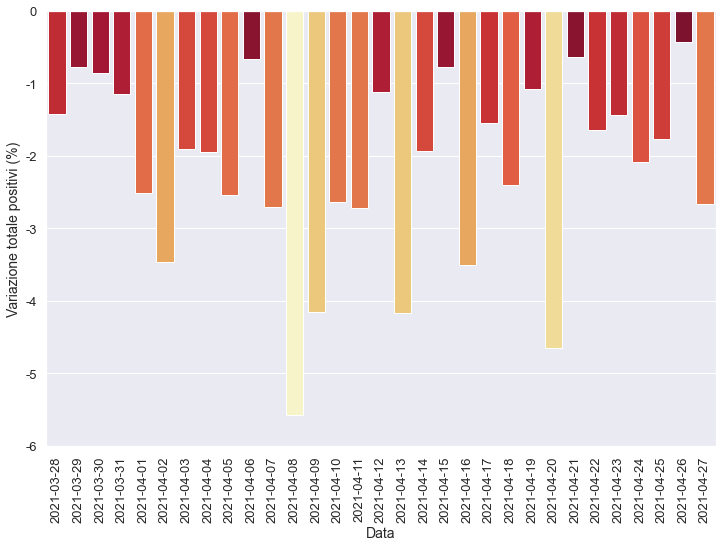

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

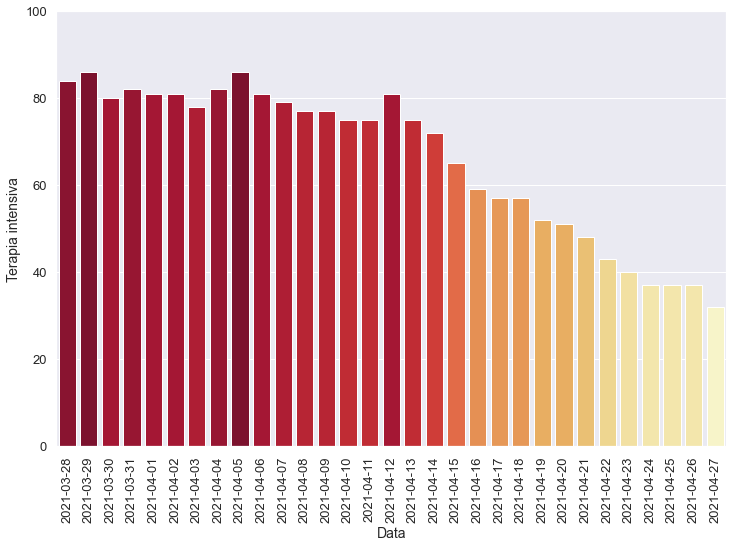

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

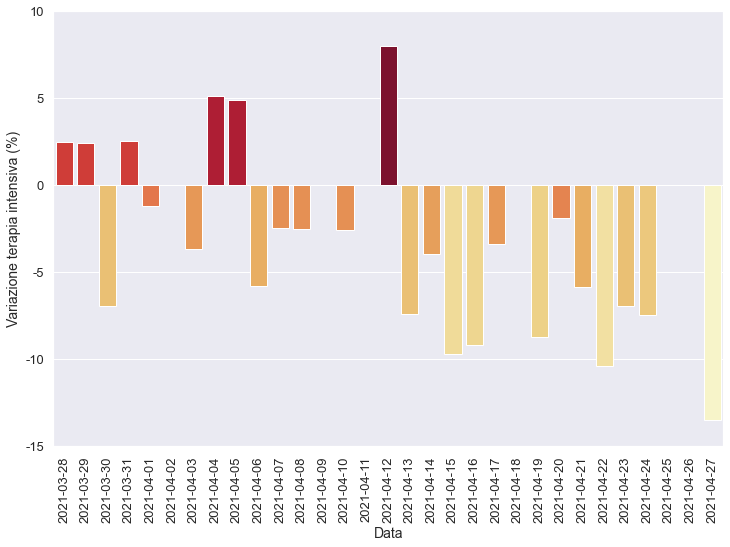

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

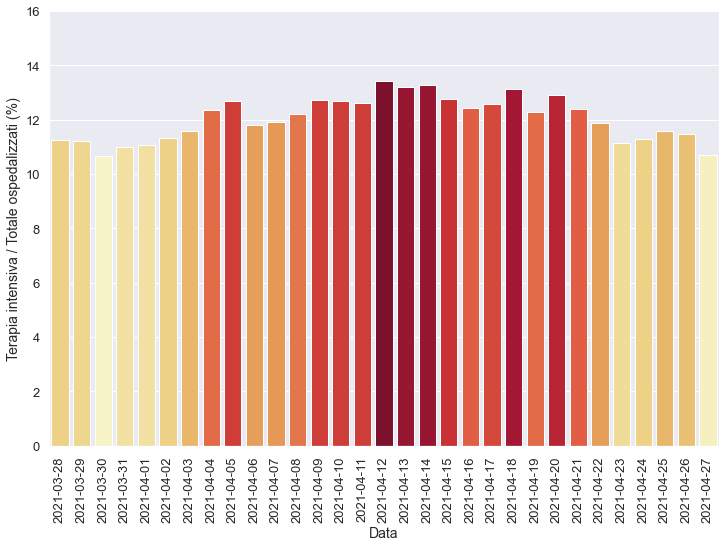

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

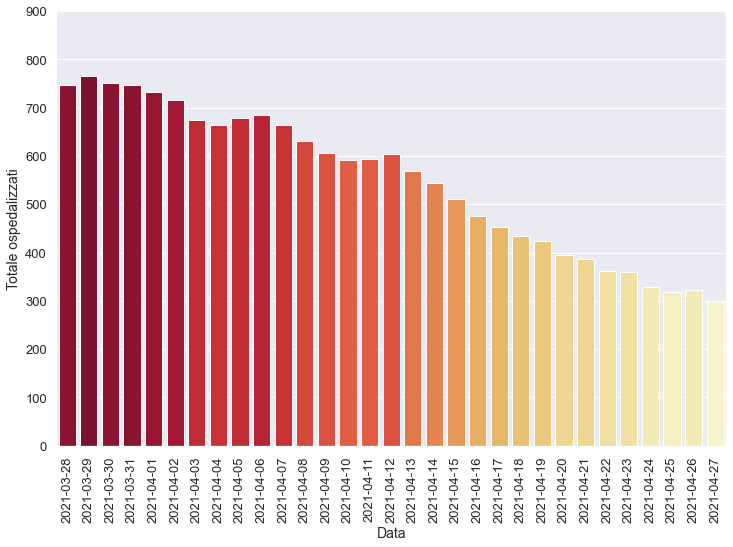

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

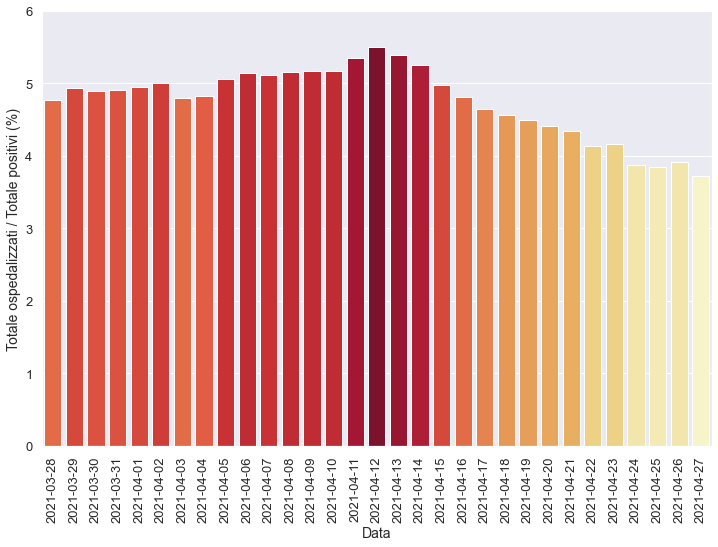

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

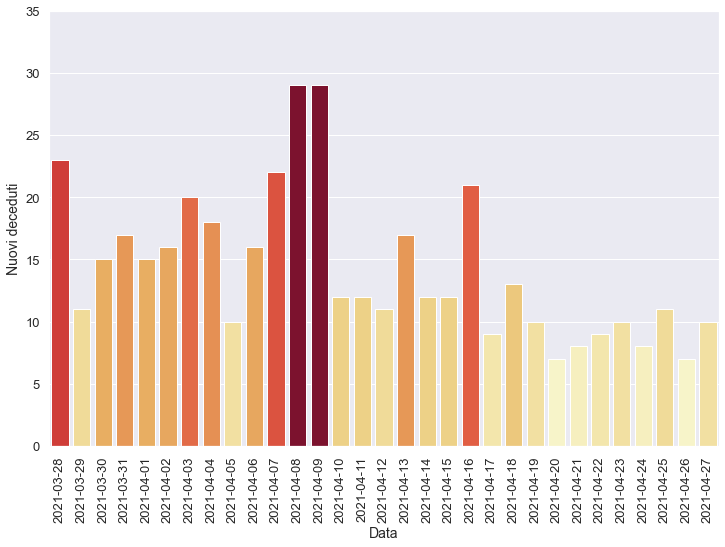

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

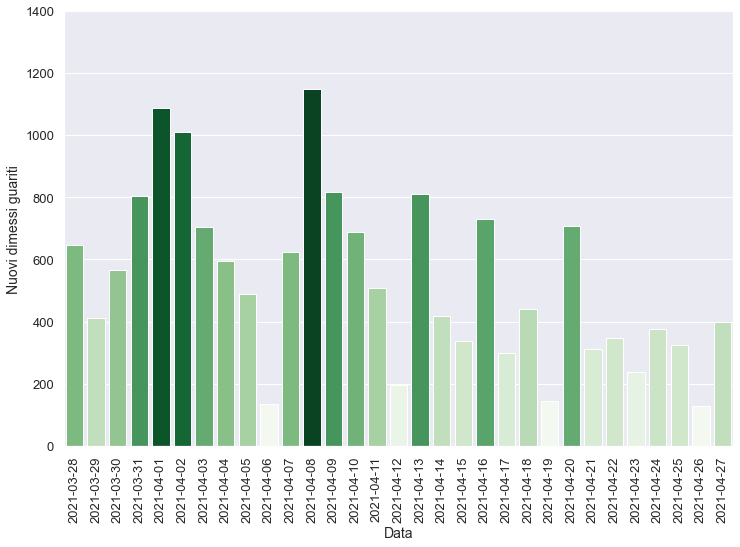

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,6,Friuli Venezia Giulia,344,51,395,8563,8958,-437,277,...,7.0,8189.0,2209.0,-409.0,12.91,4.41,3.38,12.54,-1.92,-4.65
1,2021-04-21T17:00:00,6,Friuli Venezia Giulia,339,48,387,8515,8902,-56,263,...,8.0,8535.0,2082.0,-48.0,12.40,4.35,3.08,12.63,-5.88,-0.63
2,2021-04-22T17:00:00,6,Friuli Venezia Giulia,319,43,362,8394,8756,-146,210,...,9.0,7442.0,1832.0,-121.0,11.88,4.13,2.82,11.46,-10.42,-1.64
3,2021-04-23T17:00:00,6,Friuli Venezia Giulia,319,40,359,8272,8631,-125,124,...,10.0,5797.0,1022.0,-122.0,11.14,4.16,2.14,12.13,-6.98,-1.43
4,2021-04-24T17:00:00,6,Friuli Venezia Giulia,291,37,328,8123,8451,-180,204,...,8.0,8398.0,1934.0,-149.0,11.28,3.88,2.43,10.55,-7.50,-2.09
5,2021-04-25T17:00:00,6,Friuli Venezia Giulia,282,37,319,7982,8301,-150,184,...,11.0,6635.0,2059.0,-141.0,11.60,3.84,2.77,8.94,0.00,-1.77
6,2021-04-26T17:00:00,6,Friuli Venezia Giulia,286,37,323,7942,8265,-36,100,...,7.0,3033.0,1099.0,-40.0,11.46,3.91,3.30,9.10,0.00,-0.43
7,2021-04-27T17:00:00,6,Friuli Venezia Giulia,267,32,299,7745,8044,-221,186,...,10.0,7347.0,2016.0,-197.0,10.70,3.72,2.53,9.23,-13.51,-2.67


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

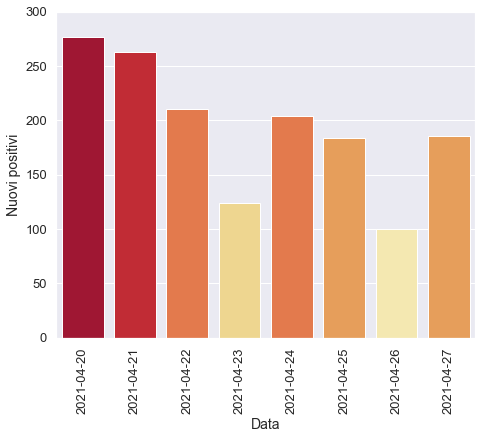

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

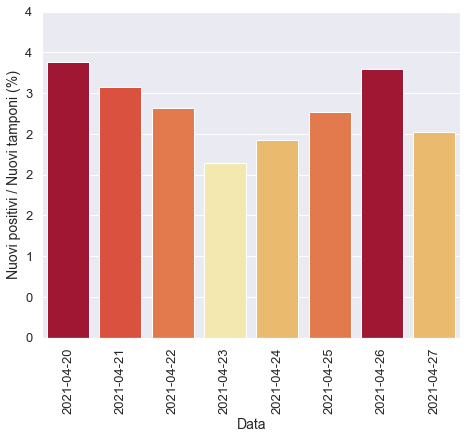

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

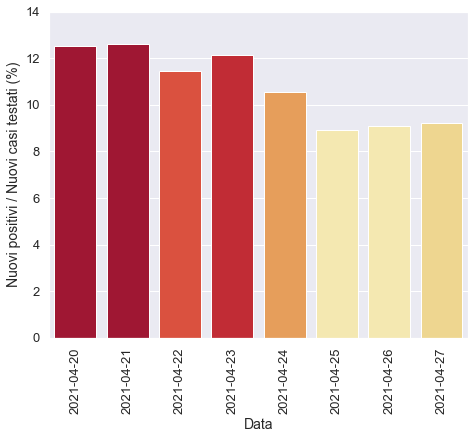

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

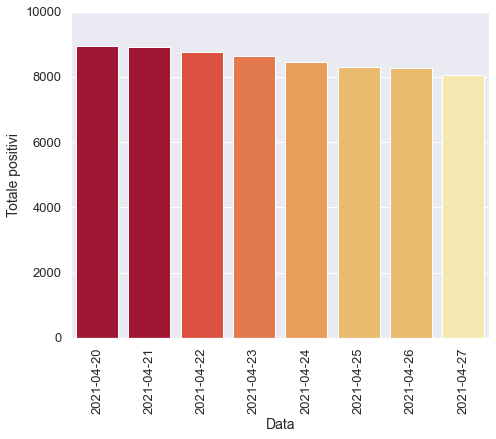

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

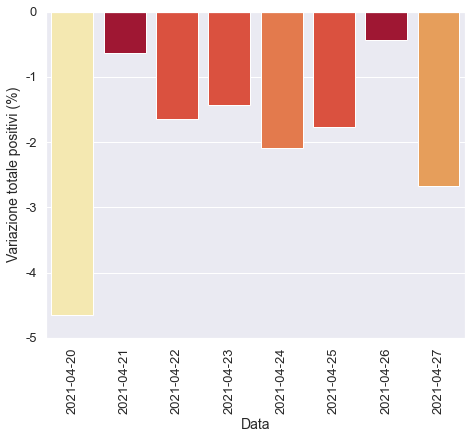

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

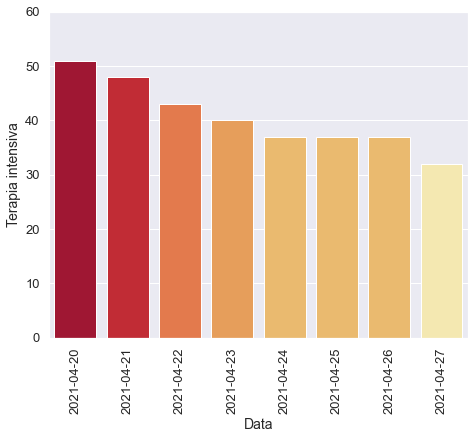

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

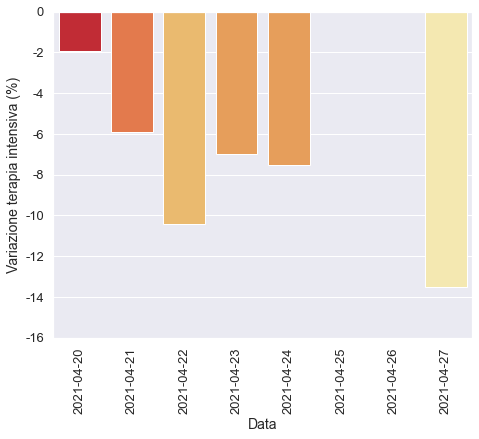

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

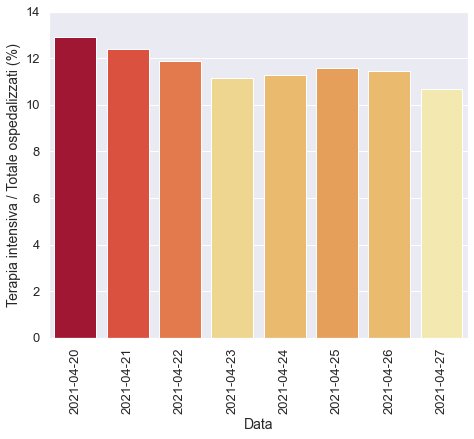

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

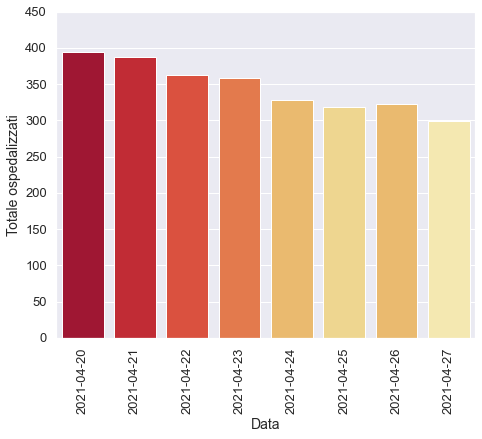

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

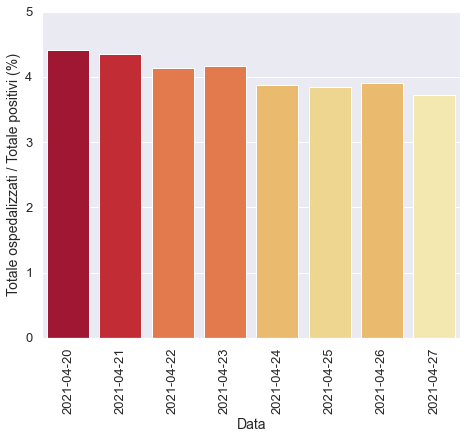

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

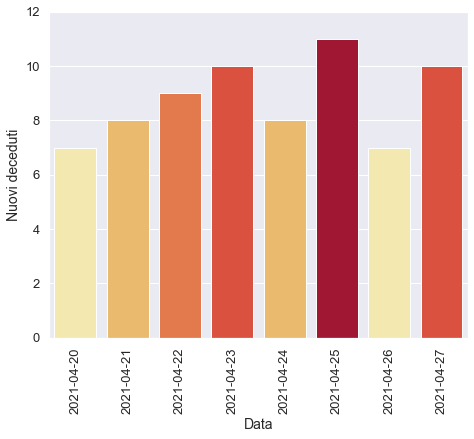

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

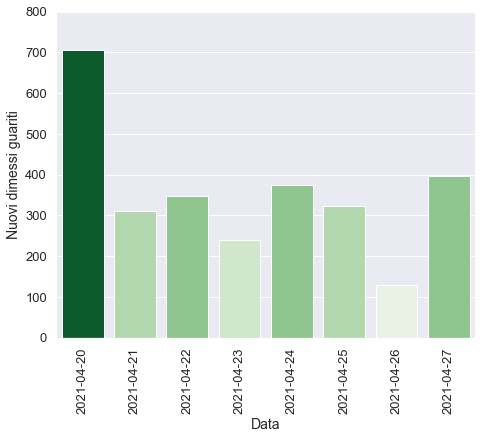

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)